In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm
import seaborn as sns
# from sklearn.linear_model import LinearRegression
# from sklearn.preprocessing import PolynomialFeatures
# from sklearn.pipeline import make_pipeline
# from sklearn.base import BaseEstimator, TransformerMixin

# 1. Dot Product

Write a function `matrix_multiply(A, B)` using for loops, `+` and `*` that takes in two matrices (can be list of lists, or 2d numpy array) and returns their dot product (matrix multiplication). It should work with column vectors ($k \times 1$ dimensions) and row vectors ($1 \times k$) normally.


```import numpy as np

A = [
    [1,2,3],
    [4,5,6]
]

B = [
    [1,2,3],
    [4,5,6],
    [7,8,9]
]

matrix_multiply(A,B)

RETURNS: 
[[30, 36, 42],
 [66, 81, 96]]

---------example 2-------------
# This is a row vector
A = np.array([
    [1,2,3]
])

# This is a column vector
B = np.array([
    [1],
    [4],
    [7]
])

matrix_multiply(A,B)

RETURNS:
[[30]]

```

Use `np.dot` to test your output

In [13]:
"""
Question 1 Answer.
"""

def matrix_multiply(A,B):
    A = np.array(A)
    B = np.array(B)
    # init output matrix with shape of input
    res = np.zeros((A.shape[0], B.shape[1]))
    for i in range(res.shape[0]):
        for j in range(res.shape[1]):
            # for every i,j pos in result
            # sum the product of A[i] & B[j]
            res[i,j] = sum(A[i,:] * B[:,j]) 
    return res

#  ============================================

A = [
    [1,2,3],
    [4,5,6]
]

B = [
    [1,2,3],
    [4,5,6],
    [7,8,9]
]

C = [
    [1,2,3]
]

D = [
    [1],
    [4],
    [7]
]

matrix_multiply(A,B), matrix_multiply(C,D)

(array([[30., 36., 42.],
        [66., 81., 96.]]),
 array([[30.]]))

# 2 Matrix Math torture

**2.1** Give a 3 examples of non-invertible square matrices that are non-zero

**2.2** Explain why the identity matrix $I$ is necessarily a square matrix with only $1$'s on the diagonal (hint: use the dot product from Q1)

**2.3** The **trace** is commutative for two matrices so $tr(AB) = tr(BA)$. Give an example where this is false for 3 matrices which can all be multiplied together.

**2.4** Give an example of a nonzero $4 \times 4$ idempotent matrix (where $A \cdot A = A^2 = A$)

**2.5** solve the following system of equations for `x`, `y` and `z` using matrices and `numpy.linalg.solve`

$$x 	+ 	y 	+ 	z 	= 	6$$

$$2y 	+ 	5z 	= 	−4$$

$$2x 	+ 	5y 	− 	z 	= 	27$$

In [16]:
# 2.1, tool to demonstrate non-invertible matrices

# n = 0
# number_of_matrices = 5
# while n < number_of_matrices:
#     matrix = np.random.randint(0,10, size=(3,3))
#     if np.linalg.det(matrix) == 0:
#         n += 1
#         print(matrix)
#         print("==========")

In [4]:
"""
Answers for Q2:
1. Identity matrix with any of the diag 1s swapped for 0.
   See cell above for more.
2. Non-square would result in a loss of information. (Can use transpose as workaround?)
3. Trace is only commutative for n x n matrices, so false for any non-square matrix.
4. 4x4 Identity matrix
5. See below.
"""
# A = [[1,1,1],
#     [0,2,5],
#     [2,5,-1]]
# A = np.array(A)

# B = [[6],
#     [-4],
#     [27]]
# B = np.array(B)
# np.linalg.solve(A, B)

'\nAnswers for Q2:\n1. Identity matrix with a 1 swapped for 0, 3 times.\n2. Non-square would result in a loss of information\n3. Trace is only commutative for n x n matrices, so non-square?\n4. 4x4 Identity matrix\n5. Below\n'

# 3.1 Boston regression

Using statsmodels and the `boston` dataset, make a regression model to predict house prices. Don't forget to add a constant (intercept) term. Note that statsmodels can take a `pd.DataFrame` as an input for `X`.

Report the $R^2$ and coefficients on each feature

In [5]:
from sklearn.datasets import load_boston
import statsmodels.api as sm

bost = load_boston()
df = pd.DataFrame(data= bost['data'],
                  columns= bost['feature_names'])
y = bost['target']
df = sm.add_constant(df)
mod = sm.OLS(y,df).fit(cov_type='HC2')
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     90.57
Date:                Sat, 16 Jan 2021   Prob (F-statistic):          2.33e-121
Time:                        13:04:14   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:                  HC2                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      8.145      4.477      0.000      20.496      52.423
CRIM          -0.1080      0.031     -3.478      0.001      -0.169      -0.047
ZN             0.0464      0.014      3.345      0.001       0.019       0.074
INDUS          0.0206      0.051      0.406      0.685      -0.079       0.120
CHAS           2.6867      1.310      2.051      0.040       0.119       5.254
NOX          -17.7666      3.827     -4.643      0.000     -25.267     -10.266
RM             3.8099      0.861      4.426      0.000       2.123       5.497
AGE            0.0007      0.017      0.042      0.967      -0.032       0.033
DIS           -1.4756      0.217     -6.812      0.000      -1.900      -1.051
RAD            0.3060      0.062      4.908      0.000       0.184       0.428
TAX           -0.0123      0.003     -4.540      0.000      -0.018      -0.007
PTRATIO       -0.9527      0.118     -8.060      0.000      -1.184      -0.721
B              0.0093      0.003      3.435      0.001       0.004       0.015
LSTAT         -0.5248      0.101     -5.176      0.000      -0.723      -0.326
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC2)
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# 3.2 Polynomial features

Use polynomial features to improve your regression model in `2.1`. You can use squared and cubic features. Try to find a model that minimizes the `AIC` or `BIC` of your output table.

In [6]:
# from sklearn.preprocessing import PolynomialFeatures
# poly = PolynomialFeatures(3)
# df_p = pd.DataFrame(poly.fit_transform(df), columns= poly.get_feature_names(df.columns))

# saving for posterity

In [7]:
# square/cube all features sans chas/const
# model until AIC/BIC minimized
# drop: age, indus, zn

from sklearn.datasets import load_boston
import statsmodels.api as sm
bost = load_boston()
df = pd.DataFrame(data= bost['data'],
                  columns= bost['feature_names'])
y = bost['target']

# dropped cols determined by iterative testing
df = df.drop(['CHAS','INDUS','AGE','ZN'], 1)

col = df.columns
col2 = [e + '2' for e in col]
col3 = [e + '3' for e in col]
for e in col:
    df[e + '2'] = df[e]**2
    df[e + '3'] = df[e]**3

# change here to switch between 2/3 degree
df = df[col2]
df = sm.add_constant(df)
mod = sm.OLS(y,df).fit(cov_type='HC2')
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.687
Method:                 Least Squares   F-statistic:                     110.2
Date:                Sat, 16 Jan 2021   Prob (F-statistic):          2.41e-112
Time:                        13:04:14   Log-Likelihood:                -1541.6
No. Observations:                 506   AIC:                             3103.
Df Residuals:                     496   BIC:                             3146.
Df Model:                           9                                         
Covariance Type:                  HC2                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         19.1149      3.719      5.139      0.000      11.825      26.405
CRIM2         -0.0015      0.000     -4.084      0.000      -0.002      -0.001
NOX2         -11.4377      2.321     -4.928      0.000     -15.987      -6.888
RM2            0.4605      0.054      8.469      0.000       0.354       0.567
DIS2          -0.0599      0.013     -4.534      0.000      -0.086      -0.034
RAD2           0.0071      0.002      2.911      0.004       0.002       0.012
TAX2       -8.818e-06   3.28e-06     -2.688      0.007   -1.52e-05   -2.39e-06
PTRATIO2      -0.0320      0.003     -9.857      0.000      -0.038      -0.026
B2          2.421e-05   6.73e-06      3.595      0.000     1.1e-05    3.74e-05
LSTAT2        -0.0085      0.002     -3.527      0.000      -0.013      -0.004
==============================================================================
Omnibus:                      259.196   Durbin-Watson:                   0.891
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2296.954
Skew:                           2.053   Prob(JB):                         0.00
Kurtosis:                      12.597   Cond. No.                     3.87e+06
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC2)
[2] The condition number is large, 3.87e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# 3.3 Feature plotting

Now that you have a better model, make a regression figure plot for an important feature. The regression plot should be like the ones made at the end of part 3 of this lecture (scatterplot + regression line). It should have the following:

- Have the `x` axis be the values from one of your important features. The values should range from the `[min, max]` of the observed values in the dataset.

- The y axis on each chart is the target value (house price)

- You should have a scatter plot of the datapoints for the feature + the regression line of predicted values on each

- If you used non-linearities (squared and/or cube input) the regression curve should be nonlinear as well

- When plotting values for a single variable, you can set all the other values to their `mean` or `median` when you put them in your model's prediction

<Figure size 432x288 with 0 Axes>

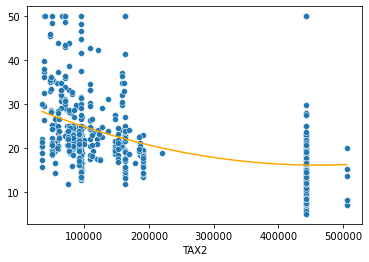

<Figure size 432x288 with 0 Axes>

In [21]:
from sklearn.datasets import load_boston
import statsmodels.api as sm
bost = load_boston()
df = pd.DataFrame(data= bost['data'],
                  columns= bost['feature_names'])
y = bost['target']

# dropped cols determined by iterative testing
df = df.drop(['CHAS','INDUS','AGE','ZN'], 1)

col = df.columns
col2 = [e + '2' for e in col]
col3 = [e + '3' for e in col]
for e in col:
    df[e + '2'] = df[e]**2
    df[e + '3'] = df[e]**3

# filtering here to switch between 2/3 degree
df = df[col2]
# add constant before processing
df = sm.add_constant(df)
mod = sm.OLS(y,df).fit(cov_type='HC2')
#predicted yvals
yhat = mod.predict(df)

df = df['TAX2']
fig, ax = plt.subplots()
sns.scatterplot(x=df, y=y)
# linspaced xvals from min to max
xfit = np.linspace(df.min(), df.max(), 100)
coeff = np.polyfit(df.values.flatten(), yhat.values.flatten(), 2)
plt.plot(xfit,np.polyval(coeff,xfit),color='orange')
plt.figure()

# 3.4 Multi-feature plotting

Make a single matplotlib `figure` object with the same chart as in **2.4** but with 4 charts instead for your 4 most important features. 

Do not copy-paste code for each feature you visualize in the plot. Extract your code into a function so you can just have something like

```python
fix, ax1, ax2, ax3, ax4 = plt.subplots((2,2))
reg_plot_on_ax(feature_1, ax1)
reg_plot_on_ax(feature_2, ax2)
reg_plot_on_ax(feature_3, ax3)
reg_plot_on_ax(feature_4, ax4)
```

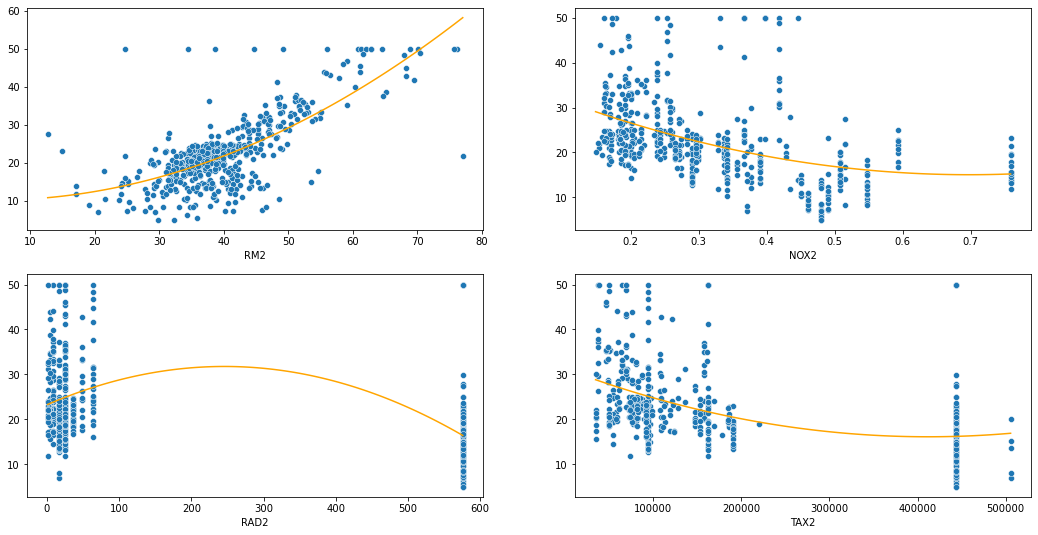

In [31]:
bost = load_boston()
df = pd.DataFrame(data= bost['data'],
                  columns= bost['feature_names'])
y = bost['target']
# dropped cols determined by iterative testing
df = df.drop(['CHAS','INDUS','AGE','ZN'], 1)

col = df.columns
col2 = [e + '2' for e in col]
col3 = [e + '3' for e in col]
for e in col:
    df[e + '2'] = df[e]**2
    df[e + '3'] = df[e]**3

def r_plot(ft, ax, df):
    df = df[ft]
    minval = df.min()
    maxval = df.max()
    coeff = np.polyfit(df.values.flatten(), y, 2)
    sns.scatterplot(x=df, y=y, ax=ax)
    xfit = np.linspace(minval, maxval, 100)
    yhat = np.polyval(coeff,xfit)
    sns.lineplot(x=xfit, y=yhat, ax=ax, color='orange')

fig, ax = plt.subplots(2,2, figsize=(18,9))
axl = [ax[0,0], ax[0,1], ax[1,0], ax[1,1]]
feat = ['RM2', 'NOX2', 'RAD2', 'TAX2']
for i in range(len(feat)):
    r_plot(feat[i], axl[i], df)